# Data Analytics Graduate Capstone - D214: Regression Analysis of Heart Attack Risk
## A1. Research Question
To what extent does cholesterol and diabetes affect heart attack risk?

## A2. Justification
Logistic regression is the appropriate technique to use to analyze the research question because the target variable, heart attack risk, is a binary categorical dependent variable. The multiple explanatory variables can be continuous and categorical. Performing logistic regression will determine if the explanatory variables have a positive or negative impact on the chosen target variable. This predictive model will give an indication of what independent variables directly affect heart attack risk as we add or remove them.

## A3. Context
Data analysis through logistic regression will analyze the provided dataset of patient records to determine if there is a correlation between risk of heart attack and the features shown below. Many factors increase the risk of a heart attack, including lifestyle choices, genetic factors, and age. Perhaps the knowledge of what specific features to be cautious of after the analysis is conducted will be beneficial for the patient to know to lower the risk of a heart attack. The research conducted by Rungtranont, 2023 does not use the same dataset as the one I will be using. However, I did get my inspiration from this researcher. This researcher performs EDA, finds the positive and negative correlations, and conducts clustering analysis to predict if patients are at risk of heart diseases. The researcher’s conclusion was that certain clustering techniques gave the highest accuracy, but interpretability of the model should be considered. The researcher recommended to use logistic regression although it may have a slightly lower accuracy.

## A4. Hypothesis
The project topic is about exploring features relevant to heart health and lifestyle choices to determine if any of the features, including indicators such as cholesterol and diabetes, have a higher impact on the presence or absence of a heart attack risk than the other features through logistic regression analysis. Therefore, the hypotheses of the analysis is:
* Null Hypothesis-  Cholesterol and diabetes do not statistically significantly affect the risk of a heart attack.          
* Alternate Hypothesis- Cholesterol and diabetes statistically significantly affect the risk of a heart attack.

The null hypothesis means there is no significant effect on heart attack risk because of cholesterol and diabetes. This would mean any observed difference in heart attack rates is simply due to chance and not a real effect of the factors being studied. The goal is to reject the null hypothesis if the data provides sufficient evidence against it. The alternate hypothesis is the statement that is the opposite of the null hypothesis that I am trying to prove by performing the data analysis.

## B1. Data Collected 
The provided dataset has 8763 global patient records consisting of 26 features related to heart health, lifestyle choices, lifestyle factors, and medical aspects to conduct a predictive analysis of the binary categorical feature, if the patient is at risk of a heart attack or not.

I will be using the “Heart Attack Risk Prediction” csv file from Kaggle. The link to the Kaggle dataset being used for analysis: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data

This dataset is a made-up creation generated using ChatGPT that mimics a realistic experience. It helps beginners and data enthusiasts learn from a dataset that resembles real-world situations. The goal is to support learning and experimentation in data analysis. The variable names, a description of the variable, and data type can be found below:
* Patient ID: A unique ID given to each patient (Categorical)
* Age: Patient's age (Continuous)
* Sex: Patient's gender (Categorical)
* Cholesterol: Patient's cholesterol levels (Continuous)
* Blood Pressure: Patient's blood pressure (Continuous)
* Heart Rate: Patient's heart rate (Continuous)
* Diabetes: If the patient has diabetes or not, 1: Diabetes/0: No diabetes (Categorical)
* Family History: If the patient has family history of heart-related problems, 1: Family history/0: No family history (Categorical)
* Smoking: If the patient smokes or not, 1: Smoker/0: Non-smoker (Categorical)
* Obesity: If the patient is obese or not, 1: Obese/0: Not obese (Categorical)
* Alcohol Consumption: Patient's level of alcohol consumption, None/Light/Moderate/Heavy (Categorical)
* Exercise Hours Per Week: Number of exercise hours per week (Continuous)
* Diet: Patient's dietary habits, Healthy/Average/Unhealthy (Categorical)
* Previous Heart Problems - If the patient has previous heart problems, 1: Yes/0: No (Categorical)
* Medication Use: Patient's medication usage, 1: Yes/0: No (Categorical)
* Stress Level: Patient's stress level, 1-10 (Continuous)
* Sedentary Hours Per Day: Hours of sedentary activity per day (Continuous)
* Income - Patient's income level (Continuous)
* BMI: Patient's Body Mass Index (BMI) (Continuous)
* Triglycerides: Patient's triglyceride levels (Continuous)
* Physical Activity Days Per Week: Days of physical activity per week (Continuous)
* Sleep Hours Per Day: Hours of sleep per day (Continuous)
* Country: Country where the patient resides (Categorical)
* Continent: Continent where the patient resides (Categorical)
* Hemisphere: Hemisphere where the patient resides (Categorical)
* Heart Attack Risk: Presence of heart attack risk, 1: Yes/0: No (Categorical)

## B2. 1 Advantage & 1 Disadvantage of the Data-Gathering Methodology Used
The data-gathering methodology used for this analysis was downloading a public dataset from Kaggle.
* Advantage: Kaggle has many datasets from different industries. It is easy to find relevant data for your analysis without having to gather it yourself.
* Disadvantages: Many datasets offered on Kaggle contain already cleaned datasets. Therefore, it is harder for beginners to learn data cleaning skills.

## B3. How to Overcome Challenges of Data-Gathering Methodology Used
Concerning the challenge posed by the inability to acquire data cleaning skills on Kaggle, the dataset utilized for analysis had variables name that were not correctly formatted for Python. Additionally, the sex variable and other variables with three or more categorical variables had not been converted to dummy variables. Consequently, I was able to practice my data cleaning skills after all.

## C1. Data Cleaning Steps
The goal of data cleaning is to find any null or duplicated values in the dataset, correct any error or inconsistencies, and to get rid of any unnecessary variables that we will not be using for the regression analysis. I dropped the following columns since they are not important for the analysis question I have chosen: 'Patient ID', 'Income', 'Country', 'Continent', and 'Hemisphere'. The reason I dropped these variables is because I would rather focus on the patient's lifestyle choice and heart-related health rather than the patient’s location and their income. I have the general steps I performed in order to clean and prepare the data for testing written below:
1. Import any necessary libraries and packages.
2. Load dataset into pandas data frame using read_csv command. The data frame is named “df”.
3. Calculate the total null values and total duplicate values in the dataset. If there are not any, the values will be shown as 0. This would make the data sparsity 0%.
4. Check for the number of unique values in each column.
5. Print the columns with less than 100 unique values. This can help determine what variables I would like to drop from the analysis.
6. Drop columns that are unnecessary for the analysis.
7. Use the head() command to look at what data is left.
8. Rename the columns in proper python format.
9. Print column names to check corrections made.
10. Reformat the columns to have 2 decimal places.
11. Find the summary statistics of the variables.

In [1]:
# Import any necessary libraries & packages
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Load dataset into pandas data frame
df = pd.read_csv(r'C:\Users\ashle\Documents\heart_attack_prediction_dataset.csv',keep_default_na=False)
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [2]:
# Calculate total null values and total duplicate values in the dataset
total_nulls = df.isna().sum().sum()
total_dupes = df.duplicated().sum()

print(f"Total Nulls: {total_nulls}\nTotal Duplicate Records: {total_dupes}")

Total Nulls: 0
Total Duplicate Records: 0


In [3]:
# Check for the number of unique values in each column
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [4]:
# Print the columns with less than 100 unique values
for col in df.columns:
    if df[col].nunique()<100:
        print(col, sorted(df[col].unique()), '\n')

Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90] 

Sex ['Female', 'Male'] 

Heart Rate [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110] 

Diabetes [0, 1] 

Family History [0, 1] 

Smoking [0, 1] 

Obesity [0, 1] 

Alcohol Consumption [0, 1] 

Diet ['Average', 'Healthy', 'Unhealthy'] 

Previous Heart Problems [0, 1] 

Medication Use [0, 1] 

Stress Level [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Physical Activity Days Per Week [0, 1, 2, 3, 4, 5, 6, 7] 

Sleep Hours Per Day [4, 5, 6, 7, 8, 9, 10] 

Country ['A

In [5]:
# Drop columns that are unnecessary for the analysis
to_drop = ['Patient ID','Income','Country','Continent','Hemisphere']
df.drop(columns=to_drop,inplace=True)

df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


In [6]:
# Rename the columns in proper python format
df.rename(columns= {'Blood Pressure': 'Blood_pressure',
                    'Heart Rate': 'Heart_rate',
                    'Family History': 'Family_history',
                    'Alcohol Consumption': 'Alcohol_consumption',
                    'Exercise Hours Per Week': 'Exercise_hours_perweek',
                    'Previous Heart Problems': 'Previous_heart_problems',
                    'Medication Use': 'Medication_use',
                    'Stress Level': 'Stress_level',
                    'Sedentary Hours Per Day': 'Sedentary_hours_perday',
                    'Physical Activity Days Per Week': 'Physical_activity_perweek',
                    'Sleep Hours Per Day': 'Sleep_hours_perday',
                    'Heart Attack Risk': 'Heart_attack_risk'}, 
          inplace=True)

# Print column names to check corrections made
print(df.columns)

Index(['Age', 'Sex', 'Cholesterol', 'Blood_pressure', 'Heart_rate', 'Diabetes',
       'Family_history', 'Smoking', 'Obesity', 'Alcohol_consumption',
       'Exercise_hours_perweek', 'Diet', 'Previous_heart_problems',
       'Medication_use', 'Stress_level', 'Sedentary_hours_perday', 'BMI',
       'Triglycerides', 'Physical_activity_perweek', 'Sleep_hours_perday',
       'Heart_attack_risk'],
      dtype='object')


In [7]:
# Reformat the columns to have 2 decimal places
df['Exercise_hours_perweek'] = df.Exercise_hours_perweek.round(2)
df['Sedentary_hours_perday'] = df.Sedentary_hours_perday.round(2)
df['BMI'] = df.BMI.round(2)

df

,Age,Sex,Cholesterol,Blood_pressure,Heart_rate,Diabetes,Family_history,Smoking,Obesity,Alcohol_consumption,...,Diet,Previous_heart_problems,Medication_use,Stress_level,Sedentary_hours_perday,BMI,Triglycerides,Physical_activity_perweek,Sleep_hours_perday,Heart_attack_risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,Average,0,0,9,6.62,31.25,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,Unhealthy,1,0,1,4.96,27.19,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,Healthy,1,1,9,9.46,28.18,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,Average,1,0,9,7.65,36.46,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,Unhealthy,1,0,6,1.51,21.81,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,Healthy,1,1,8,10.81,19.66,67,7,7,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,Healthy,0,0,8,3.83,23.99,617,4,9,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,Average,1,0,5,2.38,35.41,527,4,4,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,Unhealthy,1,1,5,0.03,27.29,114,2,8,0


In [8]:
# Find the summary statistics for numerical variables
df.describe()

,Age,Cholesterol,Heart_rate,Diabetes,Family_history,Smoking,Obesity,Alcohol_consumption,Exercise_hours_perweek,Previous_heart_problems,Medication_use,Stress_level,Sedentary_hours_perday,BMI,Triglycerides,Physical_activity_perweek,Sleep_hours_perday,Heart_attack_risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014245,0.495835,0.498345,5.469702,5.993636,28.891464,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783801,0.500011,0.500026,2.859622,3.466365,6.319196,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.980000,0.000000,0.000000,3.000000,3.000000,23.420000,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.070000,0.000000,0.000000,5.000000,5.930000,28.770000,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050000,1.000000,1.000000,8.000000,9.020000,34.325000,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,10.000000,12.000000,40.000000,800.000000,7.000000,10.000000,1.000000


In [9]:
# Create a list of the categorical variables
cat_cols = df[['Sex','Diabetes','Family_history','Smoking','Obesity','Alcohol_consumption', 'Diet',
             'Previous_heart_problems','Medication_use','Heart_attack_risk']]

# Find the summary statistics for categorical variables
print('PROPORTION OF EACH CATEGORICAL VARIABLE')
for col in cat_cols:
    freq = df[col].value_counts(normalize=True).reset_index()
    freq.columns = [f'{col}','Proportion']
    print('-'*40+'\n',freq)

PROPORTION OF EACH CATEGORICAL VARIABLE
----------------------------------------
       Sex  Proportion
0    Male    0.697364
1  Female    0.302636
----------------------------------------
    Diabetes  Proportion
0         1    0.652288
1         0    0.347712
----------------------------------------
    Family_history  Proportion
0               0    0.507018
1               1    0.492982
----------------------------------------
    Smoking  Proportion
0        1    0.896839
1        0    0.103161
----------------------------------------
    Obesity  Proportion
0        1    0.501426
1        0    0.498574
----------------------------------------
    Alcohol_consumption  Proportion
0                    1    0.598083
1                    0    0.401917
----------------------------------------
         Diet  Proportion
0    Healthy    0.337784
1    Average    0.332306
2  Unhealthy    0.329910
----------------------------------------
    Previous_heart_problems  Proportion
0             

## C2. Data Preparation Steps
Exploratory data analysis (EDA) and logistic regression will be used to analyze the relationship between the features and the risk of a heart attack. EDA shows a summary of all of the variables in the dataset as the univariate visualizations. The bivariate visualizations display the independent variables and the target variable, comparing them to see if there is correlation between the two variables. Univariate and bivariate visualizations are show below.

## Exploratory Data Analysis

### Univariate Visualizations

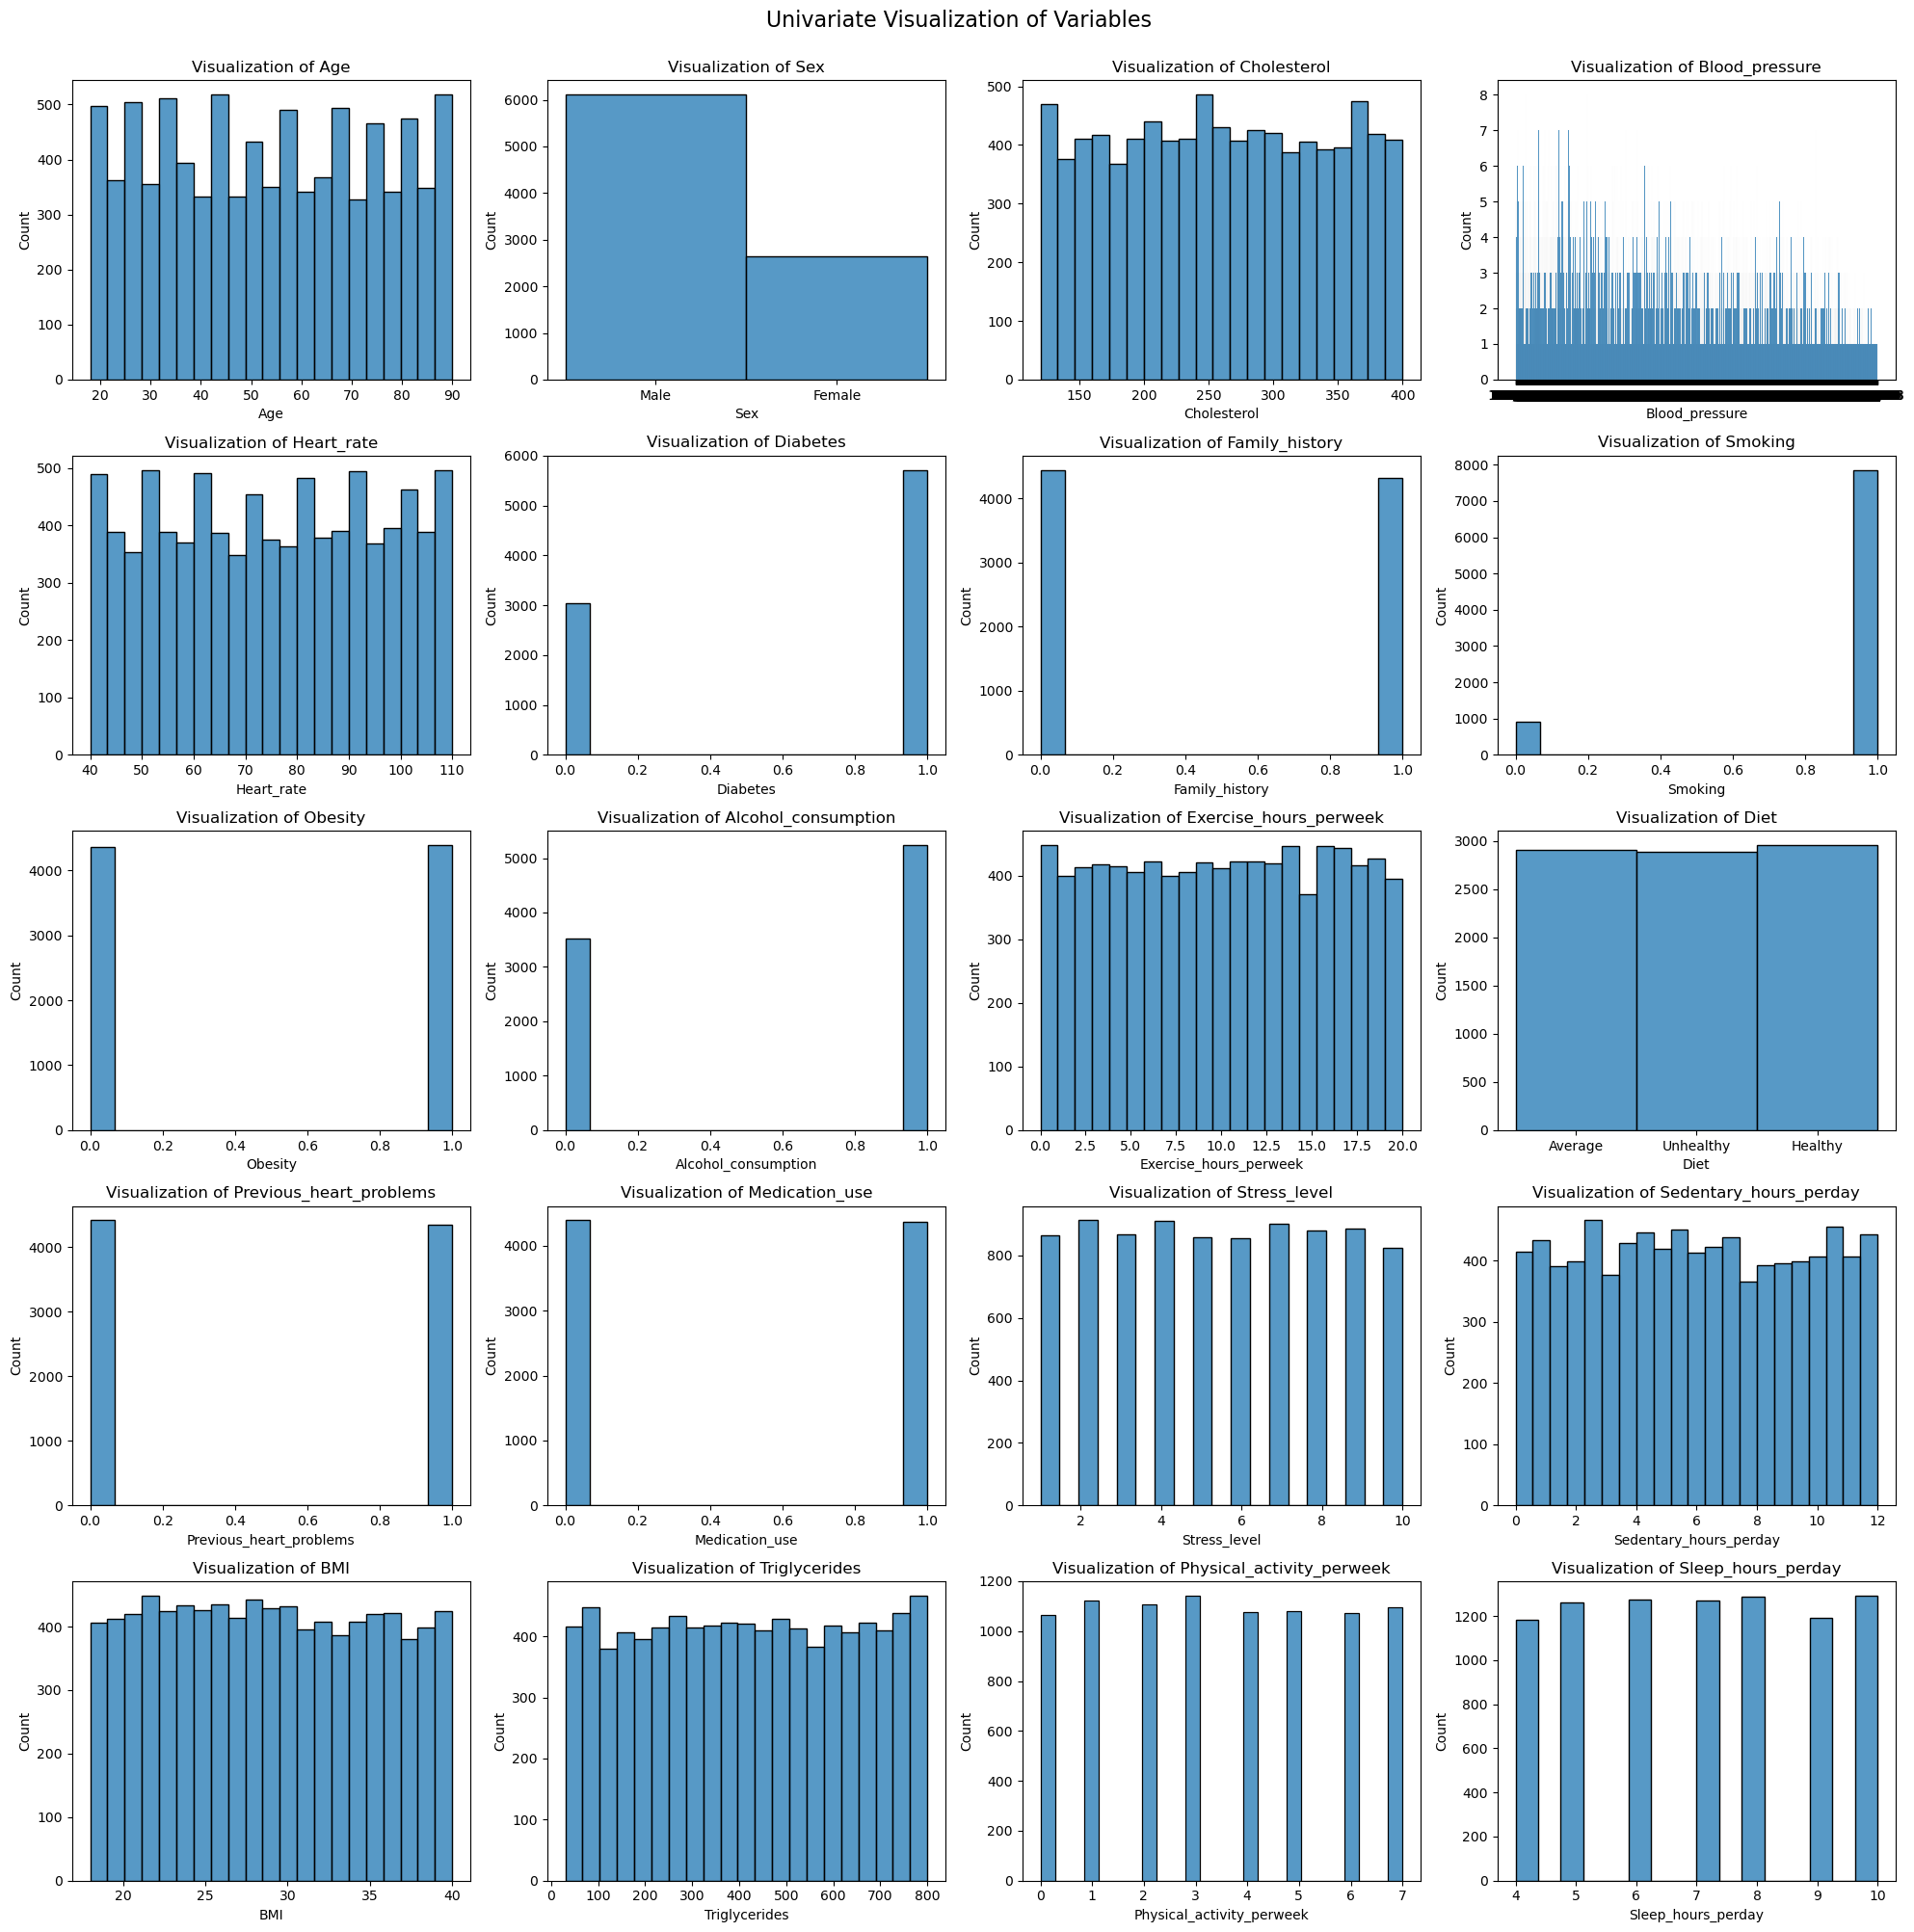

In [10]:
# Display the univariate visualization for all the predicting variables and target variable
fig_rows, fig_cols = (5, 4)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(20, 20))
i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.histplot(data=df, x=df.columns[i], ax=axes[row][col])
            axes[row][col].set_title(f"Visualization of {df.columns[i]}")
            i += 1
        except IndexError:
            break
plt.suptitle("Univariate Visualization of Variables", fontsize=16, y=1)
plt.tight_layout()
plt.show()

### Bivariate Visualizations

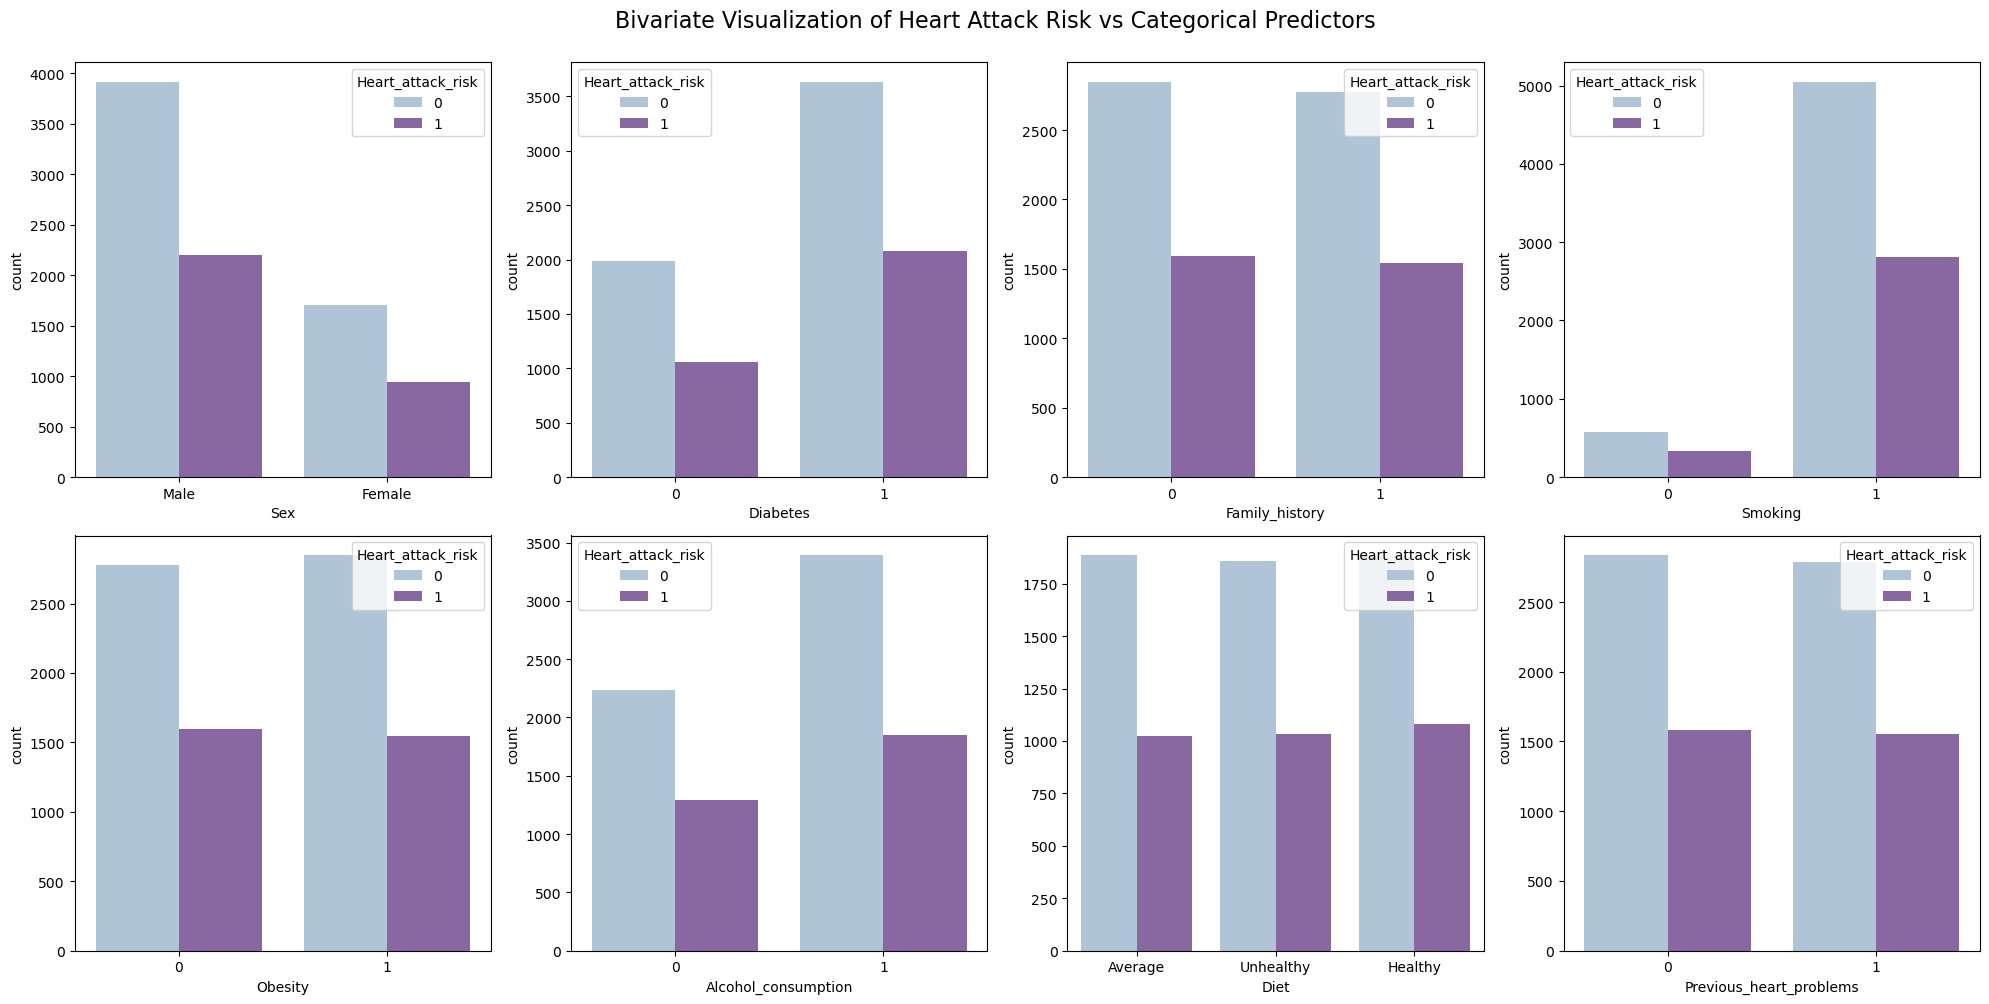

In [11]:
# Create a dataframe of categorical columns (without Heart Attack Risk)
cat_columns = df[['Sex','Diabetes','Family_history','Smoking','Obesity','Alcohol_consumption', 'Diet',
             'Previous_heart_problems','Medication_use']]

# Create a count plot for categorical predictors vs the target variable
fig, ax = plt.subplots(2,4,figsize = (20,10))    
for i , subplots in zip (cat_columns, ax.flatten()):
        sns.countplot(x= cat_columns[i],hue = df['Heart_attack_risk'],ax = subplots, palette = 'BuPu')
plt.suptitle("Bivariate Visualization of Heart Attack Risk vs Categorical Predictors", fontsize=16, y=1)
plt.tight_layout()
plt.show() # (1: Yes, 0: No)

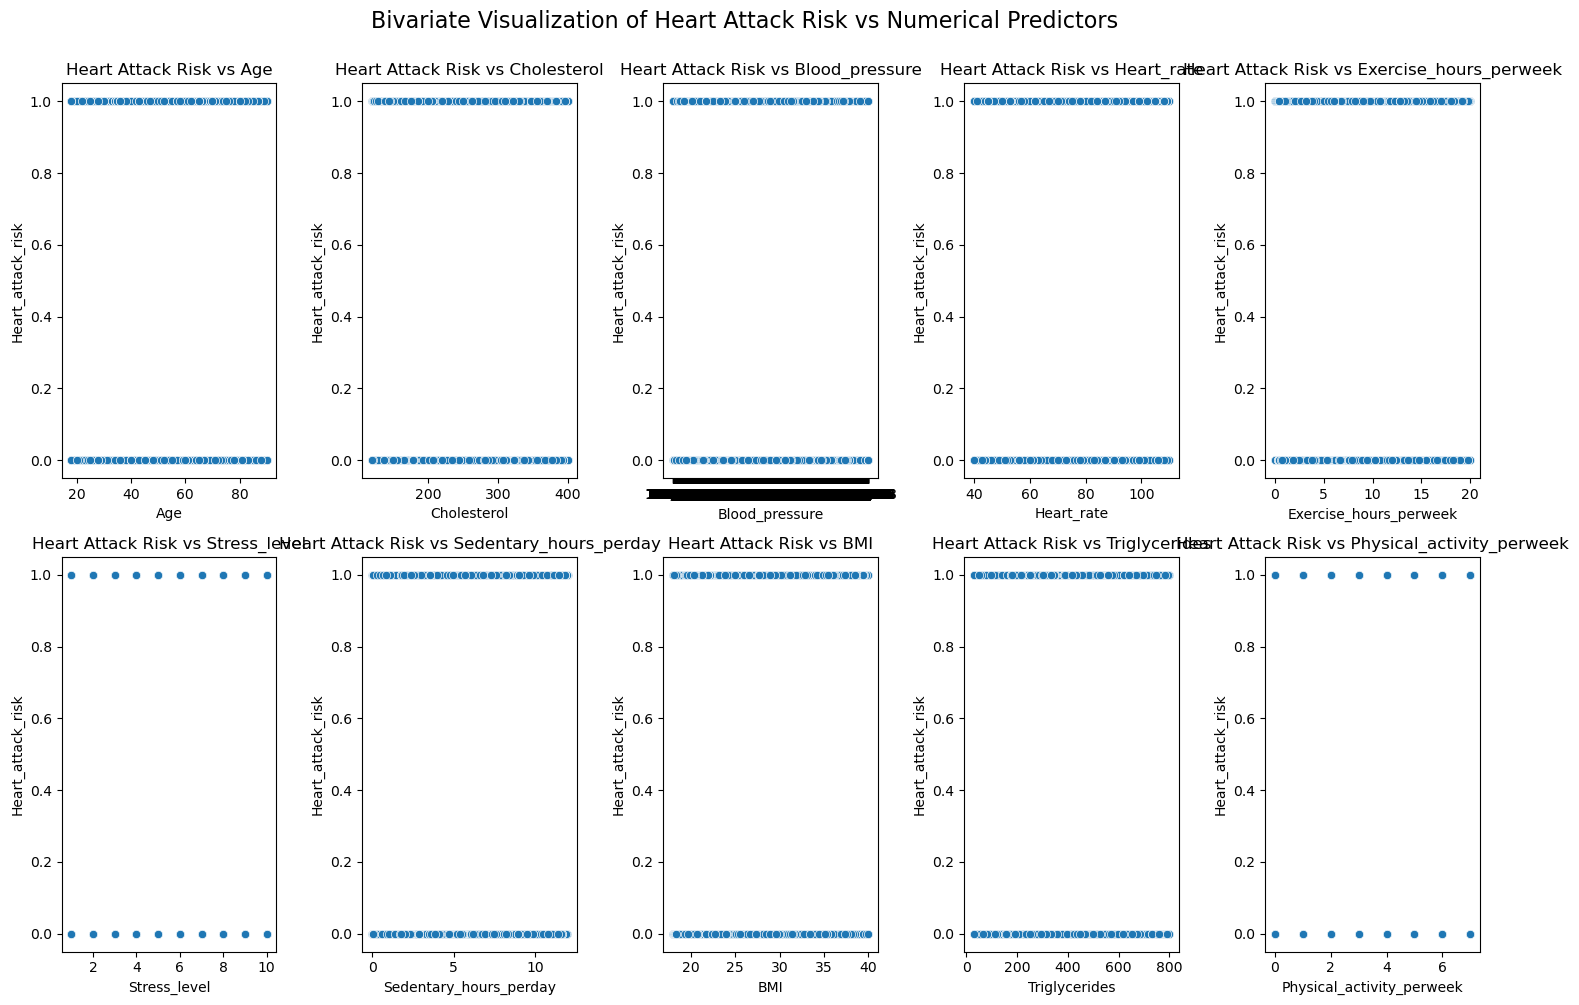

In [12]:
# Create a dataframe of numerical columns
num_columns = df[['Age','Cholesterol','Blood_pressure','Heart_rate','Exercise_hours_perweek','Stress_level',
               'Sedentary_hours_perday','BMI','Triglycerides','Physical_activity_perweek','Sleep_hours_perday']]

# Create a boxplot for numerical predictors vs the target variable
fig_rows, fig_cols = (2, 5)
fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(15, 10))
cols = list(filter(lambda x: x != "Heart_attack_risk", num_columns.columns))
i = 0
for row in range(fig_rows):
    for col in range(fig_cols):
        try:
            sns.scatterplot(data= df, x= cols[i], y="Heart_attack_risk", ax=axes[row][col])
            axes[row][col].set_title(f"Heart Attack Risk vs {cols[i]}")
            i += 1
        except IndexError:
            break

plt.suptitle("Bivariate Visualization of Heart Attack Risk vs Numerical Predictors", fontsize=16, y=1)
plt.tight_layout()
plt.show()

Since the analysis contains categorical variables, I have to re-express these variables as “dummy variables”. Dummy variables represent categorical variables as values of 0 or 1. For example, sex is categorized into 2 groups (male or female). Therefore, 1 would represent “male” and 0 would represent “female”. 

For logistic regression, one-hot encoding would have to be performed which is where the categorical data is converted to binary numeric data. For variables with more than 2 categories, each category in the dataset is represented as a column with binary values. For each entry, the column corresponding to the applicable category is marked with a '1,' while all other columns receive a '0.' This format prepares categorical data for use in machine learning models. The data transformation steps can be found below:

1. Create dummy variables for sex column where "Female" is represented by 1 & "Male" is represented by 0.
2. One-hot encode the variables with more than 2 categories by creating a dictionary to map the categories to numerical values, replace the values with the numerical encoding, and converting the column to integer type.
3. Create a heatmap to check for multicollinearity. The heatmap helps to easily identify if there are any correlations between any of the independent variables by simply looking for the dark blue color.


## Create Dummy Variables

In [13]:
# Create a dictionary to map the diet categories to numerical values
sex_mapping = {'Male': 0, 'Female': 1}

# Replace the values in the 'Sex' column with the numerical encoding
df['Sex'] = df['Sex'].replace(sex_mapping)

# Convert the 'Sex' column to integer type
df['Sex'] = df['Sex'].astype(int)

# Display the column to make sure it changed
df['Sex']

0       0
1       0
2       1
3       0
4       0
       ..
8758    0
8759    1
8760    0
8761    0
8762    1
Name: Sex, Length: 8763, dtype: int32

In [14]:
# Create a dictionary to map the diet categories to numerical values
diet_mapping = {'Unhealthy': 0, 'Average': 1, 'Healthy': 2}

# Replace the values in the 'Diet' column with the numerical encoding
df['Diet'] = df['Diet'].replace(diet_mapping)

# Convert the 'Diet' column to integer type
df['Diet'] = df['Diet'].astype(int)

# Display the column to make sure it changed
df['Diet']

0       1
1       0
2       2
3       1
4       0
       ..
8758    2
8759    2
8760    1
8761    0
8762    2
Name: Diet, Length: 8763, dtype: int32

In [15]:
# Split the 'Blood_pressure' column into two columns
df[['Systolic', 'Diastolic']] = df['Blood_pressure'].str.split('/', expand=True)

# Convert from strings to integers
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

# Drop the original 'Blood_pressure' column
df.drop('Blood_pressure', axis=1, inplace=True)

In [16]:
# Categorize the blood pressure risk 
def bp_category(Systolic, Diastolic):
    if Systolic < 120 and Diastolic < 80:
        return 'Normal'
    elif 120 <= Systolic < 140 or 80 <= Diastolic < 90:
        return 'Elevated'
    elif 140 <= Systolic < 160 or 90 <= Diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# Apply the categorization
df['Bp_risk'] = df.apply(lambda x: bp_category(x['Systolic'], x['Diastolic']), axis=1)

In [17]:
# Drop the systolic and diastolic columns
df.drop(['Systolic','Diastolic'], axis=1, inplace=True)

# Create a dictionary to map the blood pressure risk categories to numerical values
bprisk_mapping = {'Normal': 0, 'Elevated': 1, 'Hypertension Stage 1': 2, 'Hypertension Stage 2': 3}

# Replace the values in the 'Bp_risk' column with the numerical encoding
df['Bp_risk'] = df['Bp_risk'].replace(bprisk_mapping)

# Convert the 'Bp_risk' column to integer type
df['Bp_risk'] = df['Bp_risk'].astype(int)

# Display the column to make sure it changed
df['Bp_risk']

0       1
1       2
2       2
3       3
4       1
       ..
8758    0
8759    2
8760    3
8761    0
8762    1
Name: Bp_risk, Length: 8763, dtype: int32

In [18]:
df

,Age,Sex,Cholesterol,Heart_rate,Diabetes,Family_history,Smoking,Obesity,Alcohol_consumption,Exercise_hours_perweek,...,Previous_heart_problems,Medication_use,Stress_level,Sedentary_hours_perday,BMI,Triglycerides,Physical_activity_perweek,Sleep_hours_perday,Heart_attack_risk,Bp_risk
0,67,0,208,72,0,0,1,0,0,4.17,...,0,0,9,6.62,31.25,286,0,6,0,1
1,21,0,389,98,1,1,1,1,1,1.81,...,1,0,1,4.96,27.19,235,1,7,0,2
2,21,1,324,72,1,0,0,0,0,2.08,...,1,1,9,9.46,28.18,587,4,4,0,2
3,84,0,383,73,1,1,1,0,1,9.83,...,1,0,9,7.65,36.46,378,3,4,0,3
4,66,0,318,93,1,1,1,1,0,5.80,...,1,0,6,1.51,21.81,231,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,0,121,61,1,1,1,0,1,7.92,...,1,1,8,10.81,19.66,67,7,7,0,0
8759,28,1,120,73,1,0,0,1,0,16.56,...,0,0,8,3.83,23.99,617,4,9,0,2
8760,47,0,250,105,0,1,1,1,1,3.15,...,1,0,5,2.38,35.41,527,4,4,1,3
8761,36,0,178,60,1,0,1,0,0,3.79,...,1,1,5,0.03,27.29,114,2,8,0,0


## Heatmap of Correlations

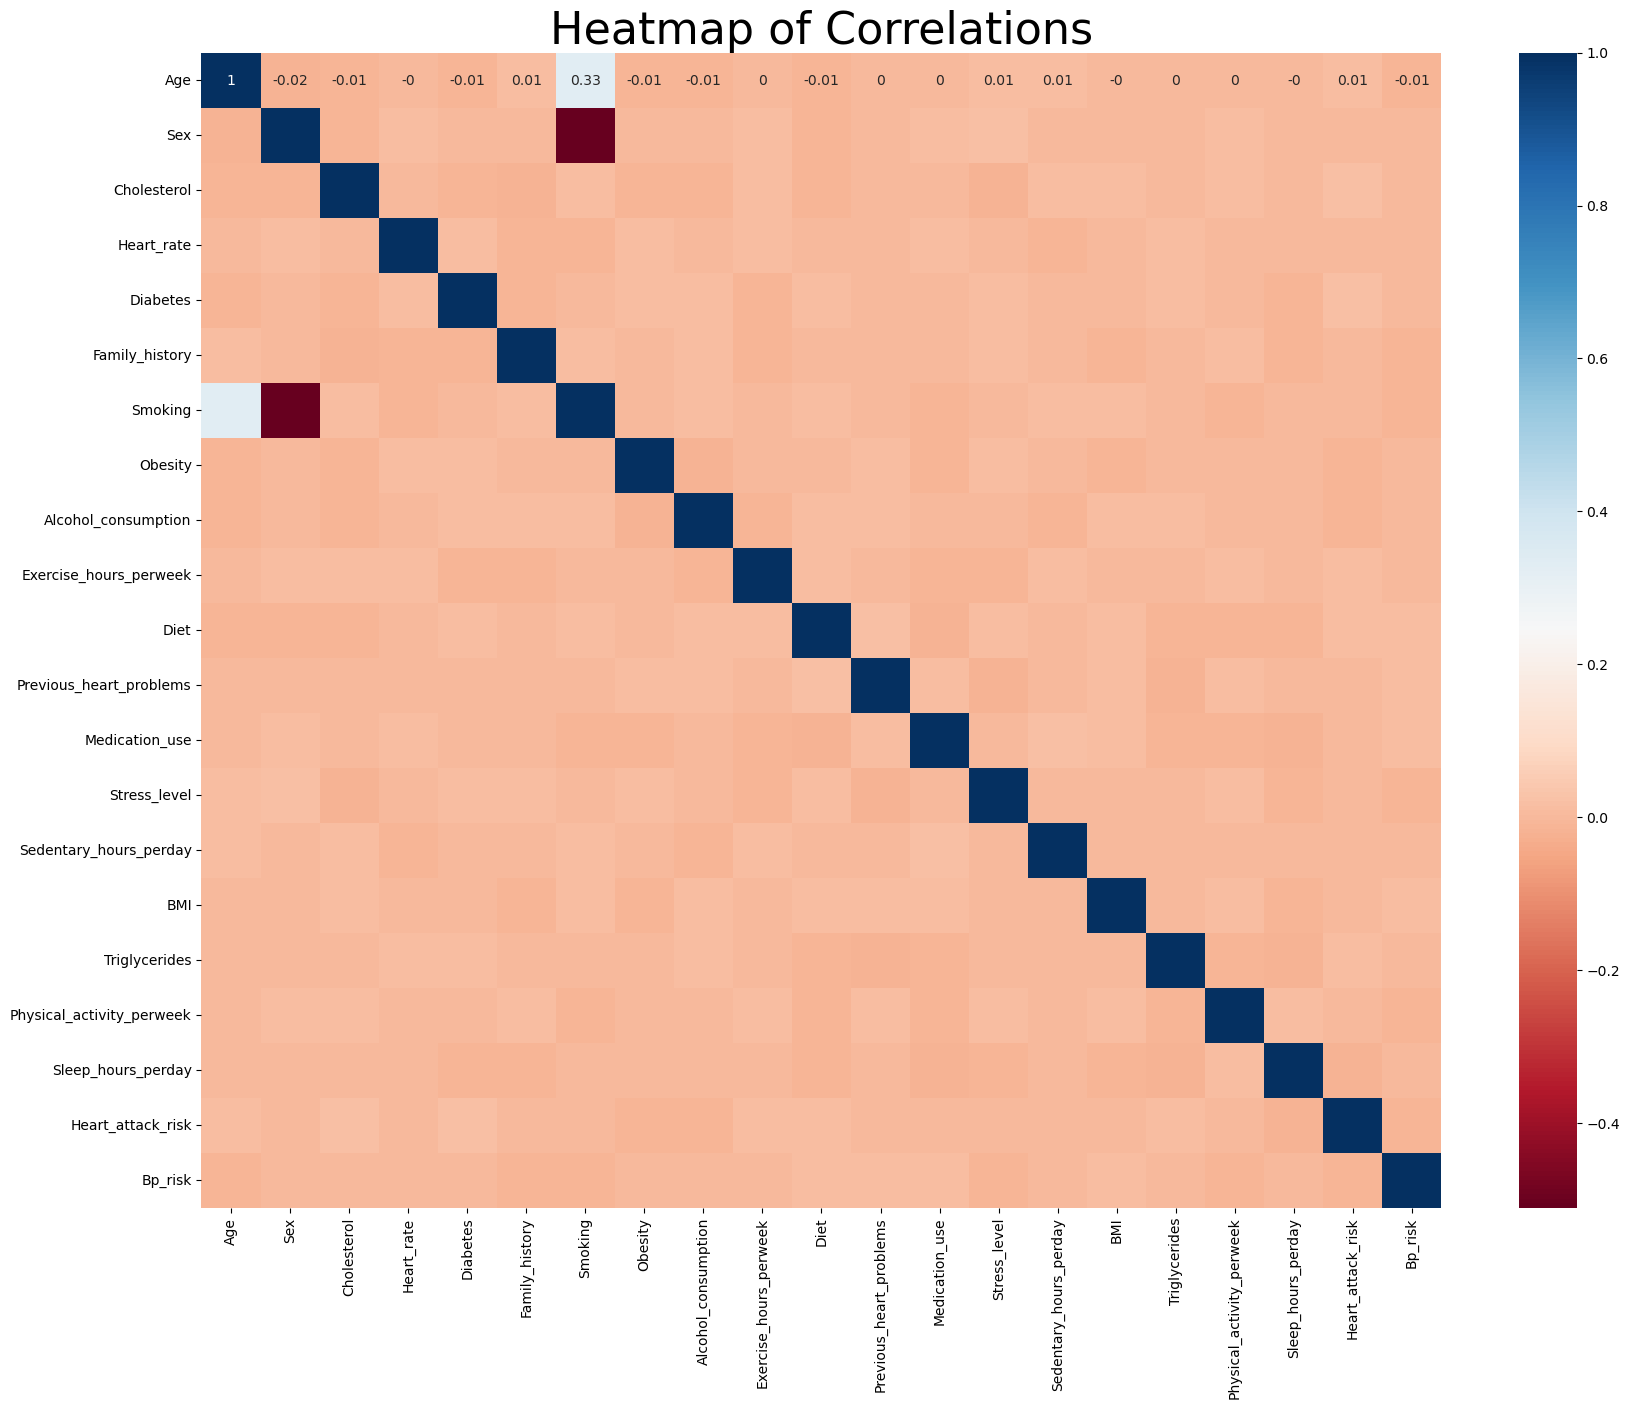

In [19]:
# Create a heatmap to check for multicollinearity
corrs = df.corr(method="kendall").round(2)
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrs, annot=True, ax=ax, cmap='RdBu')
plt.title("Heatmap of Correlations",fontsize=32)
plt.show()

## C3. Techniques Used for Data Preparation
* Exploratory data analysis - The initial step used to inspect the data using visualizations to summarize its key characteristics to determine if it should be used in the model. A disadvantage is the potential of interpretations of the relationships based on bias.
* Dummy variables - These variables allow categorical data to be included in regression models. However, a disadvantage of dummy variables are the risk of multicollinearity if they are not properly managed.

## D1.Justification of Technique Used
Logistic regression is the appropriate technique to use to analyze the research question because the target variable, heart attack risk, is a binary categorical dependent variable. The multiple explanatory variables can be continuous and categorical. Performing logistic regression will determine if the explanatory variables have a positive or negative impact on the chosen target variable. This predictive model will give an indication of what independent variables directly affect heart attack risk as we add or remove them.  

Advantages/Disadvantages of Logistic Regression: 
* Based on the logistic regression analysis from D208, a disadvantage of the study is removing features that in real-world situations, would be important to keep in the analysis. Features are removed from the analysis by calculating the variance inflation factors of the features and removing the features with too high of values and performing backward stepwise elimination to remove even more features. However, this will ultimately answer the research question of what features are correlated to the risk of heart attack. 
* An advantage of logistic regression is the analysis will give the relevance of the predictors and if the association is positive or negative to the target variable (Jain, 2020)


## D2. Calculations & Outputs

## Initial Logistic Regression Model
In Jupyter Notebook, an initial logistic model was created. It was constructed by using the statsmodel library with the Logit() function and the initial model summary was printed using the summary() function. 

In [20]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart_rate', 'Diabetes', 'Family_history',
       'Smoking', 'Obesity', 'Alcohol_consumption', 'Exercise_hours_perweek',
       'Diet', 'Previous_heart_problems', 'Medication_use', 'Stress_level',
       'Sedentary_hours_perday', 'BMI', 'Triglycerides',
       'Physical_activity_perweek', 'Sleep_hours_perday', 'Heart_attack_risk',
       'Bp_risk'],
      dtype='object')

In [21]:
# Set the dependent variable
y = df.Heart_attack_risk

# Set the multiple independent variables
X = df[['Age', 'Sex', 'Cholesterol', 'Heart_rate', 'Diabetes', 'Family_history','Smoking', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Previous_heart_problems', 'Medication_use', 'Stress_level','Sedentary_hours_perday', 'BMI', 
        'Triglycerides','Physical_activity_perweek', 'Sleep_hours_perday', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651382
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8743
Method:                           MLE   Df Model:                           19
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001533
Time:                        18:48:50   Log-Likelihood:                -5708.1
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.5544
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           0.0012      0.001      0.999      0.318      -0.

## Beginning Model Reduction: Variance Inflation Factor
To reduce the model, the VIF of all the independent variables was calculated to see which variables should be eliminated due to high multicollinearity.  After the VIF was calculated, 'BMI','Smoking', 'Heart_rate', and Sleep_hours_perday were removed one by one since they had VIF values greater than 10. 

In [22]:
# Check VIF to see which variables should be eliminated due to high multicollinearity (greater than 10)
X = df[['Age', 'Sex', 'Cholesterol', 'Heart_rate', 'Diabetes', 'Family_history','Smoking', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Previous_heart_problems', 'Medication_use', 'Stress_level','Sedentary_hours_perday', 'BMI', 
        'Triglycerides','Physical_activity_perweek', 'Sleep_hours_perday', 'Bp_risk']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                      feature        VIF
0                         Age   9.172660
1                         Sex   1.972128
2                 Cholesterol  10.246909
3                  Heart_rate  12.462100
4                    Diabetes   2.818769
5              Family_history   1.950389
6                     Smoking  15.156750
7                     Obesity   1.987918
8         Alcohol_consumption   2.458522
9      Exercise_hours_perweek   3.895988
10    Previous_heart_problems   1.967086
11             Medication_use   1.975805
12               Stress_level   4.476957
13     Sedentary_hours_perday   3.890280
14                        BMI  17.499532
15              Triglycerides   4.312058
16  Physical_activity_perweek   3.276239
17         Sleep_hours_perday  11.664753
18                    Bp_risk   3.581741


In [23]:
# Run the model after the removal of "BMI" since it had the highest VIF (17.5)
X = df[['Age', 'Sex', 'Cholesterol', 'Heart_rate', 'Diabetes', 'Family_history','Smoking', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Previous_heart_problems', 'Medication_use', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Sleep_hours_perday', 'Bp_risk']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                      feature        VIF
0                         Age   9.156054
1                         Sex   1.943628
2                 Cholesterol   9.891683
3                  Heart_rate  11.953864
4                    Diabetes   2.804662
5              Family_history   1.946464
6                     Smoking  14.731239
7                     Obesity   1.983858
8         Alcohol_consumption   2.446202
9      Exercise_hours_perweek   3.866588
10    Previous_heart_problems   1.958262
11             Medication_use   1.968140
12               Stress_level   4.430076
13     Sedentary_hours_perday   3.863414
14              Triglycerides   4.271836
15  Physical_activity_perweek   3.255183
16         Sleep_hours_perday  11.254863
17                    Bp_risk   3.549367


In [24]:
# Run the model after the removal of "Smoking" since it had the highest VIF (14.73)
X = df[['Age', 'Sex', 'Cholesterol', 'Heart_rate', 'Diabetes', 'Family_history', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Previous_heart_problems', 'Medication_use', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Sleep_hours_perday', 'Bp_risk']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                      feature        VIF
0                         Age   6.709468
1                         Sex   1.427682
2                 Cholesterol   9.640410
3                  Heart_rate  11.689981
4                    Diabetes   2.793492
5              Family_history   1.940913
6                     Obesity   1.979215
7         Alcohol_consumption   2.434732
8      Exercise_hours_perweek   3.847938
9     Previous_heart_problems   1.955291
10             Medication_use   1.966203
11               Stress_level   4.397887
12     Sedentary_hours_perday   3.841644
13              Triglycerides   4.243046
14  Physical_activity_perweek   3.246424
15         Sleep_hours_perday  10.988527
16                    Bp_risk   3.537152


In [25]:
# Run the model after the removal of "Heart_rate" since it had the highest VIF (11.69)
X = df[['Age', 'Sex', 'Cholesterol', 'Diabetes', 'Family_history', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Previous_heart_problems', 'Medication_use', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Sleep_hours_perday', 'Bp_risk']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                      feature        VIF
0                         Age   6.559413
1                         Sex   1.424372
2                 Cholesterol   9.248537
3                    Diabetes   2.770417
4              Family_history   1.936268
5                     Obesity   1.968830
6         Alcohol_consumption   2.420348
7      Exercise_hours_perweek   3.805703
8     Previous_heart_problems   1.949663
9              Medication_use   1.956588
10               Stress_level   4.341101
11     Sedentary_hours_perday   3.814490
12              Triglycerides   4.171869
13  Physical_activity_perweek   3.224371
14         Sleep_hours_perday  10.403284
15                    Bp_risk   3.499162


In [26]:
# Run the model after the removal of "Sleep_hours_perday" since it had the highest VIF (10.4)
X = df[['Age', 'Sex', 'Cholesterol', 'Diabetes', 'Family_history', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Previous_heart_problems', 'Medication_use', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Bp_risk']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df) # Make sure there are no VIF greater than 10 left in the analysis

                      feature       VIF
0                         Age  6.313941
1                         Sex  1.420054
2                 Cholesterol  8.598860
3                    Diabetes  2.745852
4              Family_history  1.928208
5                     Obesity  1.958776
6         Alcohol_consumption  2.399475
7      Exercise_hours_perweek  3.749233
8     Previous_heart_problems  1.937682
9              Medication_use  1.950930
10               Stress_level  4.262961
11     Sedentary_hours_perday  3.754582
12              Triglycerides  4.114821
13  Physical_activity_perweek  3.178088
14                    Bp_risk  3.440733


## Model Reduction: Backward Stepwise Elimination
After that, the backward stepwise elimination method was performed. This is an important reduction method because it not only reduces the number of predictors, but also helps to resolve overfitting and remove the predictors that do not significantly affect the target variable. For this reduction method, the least significant features were removed based on their p-values one at a time. Therefore, if a variable had a p-value greater than 0.10, it was removed. A 0.10 p-value was chosen, indicating a willingness to accept a higher chance of a false positive result.

In [27]:
# Perform backward stepwise elimination by removing highest p-value above 0.10 
y = df.Heart_attack_risk
X = df[['Age', 'Sex', 'Cholesterol', 'Diabetes', 'Family_history', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Previous_heart_problems', 'Medication_use', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651613
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8747
Method:                           MLE   Df Model:                           15
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001179
Time:                        18:48:50   Log-Likelihood:                -5710.1
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.5655
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           0.0006      0.001      0.613      0.540      -0.

In [28]:
# Run the model after the removal of "Family_history" since it had the highest p-value (0.944)
y = df.Heart_attack_risk
X = df[['Age', 'Sex', 'Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Previous_heart_problems', 'Medication_use', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651613
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8748
Method:                           MLE   Df Model:                           14
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001178
Time:                        18:48:50   Log-Likelihood:                -5710.1
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.4897
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           0.0006      0.001      0.612      0.540      -0.

In [29]:
# Run the model after the removal of "Previous_heart_problems" since it had the highest p-value (0.944)
y = df.Heart_attack_risk
X = df[['Age', 'Sex', 'Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Medication_use', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651613
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8749
Method:                           MLE   Df Model:                           13
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001178
Time:                        18:48:50   Log-Likelihood:                -5710.1
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.4124
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           0.0006      0.001      0.612      0.540      -0.

In [30]:
# Run the model after the removal of "Medication_use" since it had the highest p-value (0.806)
y = df.Heart_attack_risk
X = df[['Age', 'Sex', 'Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651617
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8750
Method:                           MLE   Df Model:                           12
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001173
Time:                        18:48:50   Log-Likelihood:                -5710.1
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.3402
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           0.0006      0.001      0.613      0.540      -0.

In [31]:
# Run the model after the removal of "Sex" since it had the highest p-value (0.793)
y = df.Heart_attack_risk
X = df[['Age', 'Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 
        'Exercise_hours_perweek', 'Stress_level','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651621
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8751
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001167
Time:                        18:48:50   Log-Likelihood:                -5710.2
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.2718
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           0.0006      0.001      0.618      0.537      -0.

In [32]:
# Run the model after the removal of "Stress_level" since it had the highest p-value (0.721)
y = df.Heart_attack_risk
X = df[['Age', 'Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 'Exercise_hours_perweek','Sedentary_hours_perday',  
        'Triglycerides','Physical_activity_perweek', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651628
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8752
Method:                           MLE   Df Model:                           10
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001155
Time:                        18:48:50   Log-Likelihood:                -5710.2
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.2121
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           0.0006      0.001      0.612      0.541      -0.

In [33]:
# Run the model after the removal of "Physical_activity_perweek" since it had the highest p-value (0.618)
y = df.Heart_attack_risk
X = df[['Age', 'Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 'Exercise_hours_perweek','Sedentary_hours_perday',  
        'Triglycerides', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651642
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8753
Method:                           MLE   Df Model:                            9
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001134
Time:                        18:48:50   Log-Likelihood:                -5710.3
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.1643
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                        0.0006      0.001      0.611      0.541      -0.001      

In [34]:
# Run the model after the removal of "Sedentary_hours_perday" since it had the highest p-value (0.547)
y = df.Heart_attack_risk
X = df[['Age', 'Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 'Exercise_hours_perweek',  
        'Triglycerides', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651663
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8754
Method:                           MLE   Df Model:                            8
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001102
Time:                        18:48:50   Log-Likelihood:                -5710.5
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                    0.1264
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                        0.0006      0.001      0.601      0.548      -0.001      

In [35]:
# Run the model after the removal of "Age" since it had the highest p-value (0.548)
y = df.Heart_attack_risk
X = df[['Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 'Exercise_hours_perweek',  
        'Triglycerides', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651683
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8755
Method:                           MLE   Df Model:                            7
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                0.001070
Time:                        18:48:50   Log-Likelihood:                -5710.7
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                   0.09298
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Cholesterol                0.0005      0.000      1.790      0.073   -4.69e-05      

In [36]:
# Run the model after the removal of "Triglycerides" since it had the highest p-value (0.328)
y = df.Heart_attack_risk
X = df[['Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 'Exercise_hours_perweek', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651738
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8756
Method:                           MLE   Df Model:                            6
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:               0.0009867
Time:                        18:48:50   Log-Likelihood:                -5711.2
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                   0.08006
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Cholesterol                0.0005      0.000      1.785      0.074   -4.84e-05      

In [37]:
# Run the model after the removal of "Exercise_hours_perweek" since it had the highest p-value (0.314)
y = df.Heart_attack_risk
X = df[['Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption', 'Bp_risk']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651796
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8757
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:               0.0008981
Time:                        18:48:50   Log-Likelihood:                -5711.7
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                   0.06798
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Cholesterol             0.0005      0.000      1.806      0.071   -4.24e-05       0.001
Di

In [38]:
# Run the model after the removal of "Bp_risk" since it had the highest p-value (0.310)
y = df.Heart_attack_risk
X = df[['Cholesterol', 'Diabetes', 'Obesity', 'Alcohol_consumption']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651855
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8758
Method:                           MLE   Df Model:                            4
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:               0.0008078
Time:                        18:48:50   Log-Likelihood:                -5712.2
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                   0.05547
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Cholesterol             0.0005      0.000      1.804      0.071   -4.31e-05       0.001
Di

In [39]:
# Run the model after the removal of "Obesity" since it had the highest p-value (0.203)
y = df.Heart_attack_risk
X = df[['Cholesterol', 'Diabetes', 'Alcohol_consumption']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.651947
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8759
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:               0.0006661
Time:                        18:48:50   Log-Likelihood:                -5713.0
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                   0.05465
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Cholesterol             0.0005      0.000      1.823      0.068   -3.78e-05       0.001
Di

In [40]:
# Run the model after the removal of "Alcohol_consumption" since it had the highest p-value (0.199)
y = df.Heart_attack_risk
X = df[['Cholesterol', 'Diabetes']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.652041
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8760
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:               0.0005217
Time:                        18:48:50   Log-Likelihood:                -5713.8
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                   0.05068
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Cholesterol     0.0005      0.000      1.832      0.067   -3.52e-05       0.001
Diabetes        0.0769    

In [41]:
# Run the model after the removal of "Diabetes" since it had the highest p-value (0.102)
y = df.Heart_attack_risk
X = df[['Cholesterol']].assign(const=1)

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

# This is the final reduced model because there are no p-values > 0.10

Optimization terminated successfully.
         Current function value: 0.652195
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart_attack_risk   No. Observations:                 8763
Model:                          Logit   Df Residuals:                     8761
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:               0.0002867
Time:                        18:48:50   Log-Likelihood:                -5715.2
converged:                       True   LL-Null:                       -5716.8
Covariance Type:            nonrobust   LLR p-value:                   0.07021
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Cholesterol     0.0005      0.000      1.810      0.070   -4.13e-05       0.001
const          -0.7130    

In [42]:
# Split the datset 
y = df.Heart_attack_risk
X = df[['Cholesterol']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Create the confusion matrix of the reduced model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
print('Accuracy of logistic regression classifier on train set: {:.2f}%'.format(logreg.score(X_train, y_train)*100))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy of logistic regression classifier on test set: 63.86%
Accuracy of logistic regression classifier on train set: 64.31%
[[1679    0]
 [ 950    0]]


## E1. Results
The regression equation for the reduced model: y = -0.713 - 0.0005(Cholesterol)

An interpretation of the coefficients of the reduced model:
* y represents risk of a heart attack.
* Keeping all things constant, for one unit of increase in cholesterol, the log odds of customer churn decrease by 0.05%.

Model Comparison: 
I assessed the variance inflation factors (VIF) of all independent variables to identify those contributing to multicollinearity. After removing a significant variable, I noticed that other variables’ VIFs were affected, leading to their removal as well. I then performed backward stepwise elimination to remove variables with p-values that met a 0.1 threshold. This process reduced the number of independent variables from 20 to 1.

The removal of these variables decreased the Log-Likelihood value from -5708.1 to -5715.2. It's important to compare models with the same number of predictors since Log-Likelihood decreases regardless of statistical significance. In logistic regression, the Log-Likelihood Ratio (LLR) p-value shows the model's significance. The LLR p-value dropped from 0.5544 to 0.07021. 

The hypotheses tested are:
* Null Hypothesis: Cholesterol and diabetes do not significantly affect heart attack risk.
* Alternate Hypothesis: Cholesterol and diabetes significantly affect heart attack risk.

A low LLR p-value (typically < 0.05) allows us to reject the null hypothesis, while a high p-value (typically > 0.05) means we fail to reject it. Despite dropping diabetes, the LLR p-value for the model that included both cholesterol and diabetes was 0.05068. Both values exceed 0.05, indicating a failure to reject the null hypothesis. This suggests that the model is not significantly better than one using only the intercept, meaning the predictors may not contribute much to explaining the outcome.

## E2. Limitation
Based on the logistic regression analysis results, a limitation of the study is removing features that in real-world situations, would be important to keep in the analysis. Features are removed from the analysis by calculating the variance inflation factors of the features and removing the features with too high of values and performing backward stepwise elimination to remove even more features. Another limitation of logistic regression analysis is that it cannot effectively model continuous variables or nonlinear relationships, it may struggle when the underlying relationship is too complex, and are prone to overfitting if they analyze excessive amounts of data.

## E3. Recommended Course of Action
Regarding the practical significance of the model, I find it somewhat impractical based on the model summary results and the removal of several explanatory variables due to high p-values or variance inflation factors (VIFs). Additionally, the inability to reject the null hypothesis raises questions about whether cholesterol and diabetes significantly impact heart attack risk. 
That said, the model does serve as a useful starting point, achieving 64% accuracy, and the data summary generally makes sense concerning the order in which variables were removed during the analysis. A recommended course of action based on the research question stemming from the model results would be to encourage patients to closely monitor their cholesterol levels. Individuals with diabetes must also be vigilant, as they are at a significantly higher risk of heart attacks compared to those without the condition. According to the U.S. Department of Health and Human Services, this elevated risk is primarily due to diabetes damaging the blood vessels in the heart, resulting in fatty deposit buildup and severe cardiovascular complications.

Approaches for Future Studies:
* Overall, the features included in the analysis remain important, as they are commonly assessed by doctors to evaluate a patient's risk of a heart attack. For future studies, I would suggest incorporating additional CSV files with the same variables since logistic models tend to perform better with larger datasets.
* In real-life applications, logistic regression analysis might seem like a suitable approach. However, referencing Rungtranont's research, eight different machine learning models were applied for heart disease prediction, and their performance was assessed based on accuracy. His findings indicated that the RandomForestClassifier, KNeighborsClassifier, and XGBClassifier were the models with the highest test accuracy (Rungtranont, 2023). For future studies, it may be worth exploring one of these machine learning approaches instead of sticking with logistic regression, as they could potentially yield a better-fitting model with higher accuracy.

## F. Sources
Banerjee, S. (2024a, May 11). Heart attack risk prediction dataset. Kaggle. https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data 

Rungtranont, P. (2023, June 19). 💔heart attack : 👨‍⚕️eda: Cluster: 8 ML models. Kaggle. https://www.kaggle.com/code/tumpanjawat/heart-attack-eda-cluster-8-ml-models#1-%7C-Positive-Correlations 

Jain, A. (2020, July 22). Advantages and disadvantages of logistic regression in machine learning. Medium. https://medium.com/@akshayjain_757396/advantages-and-disadvantages-of-logistic-regression-in-machine-learning-a6a247e42b20 

U.S. Department of Health and Human Services. (2021, April). Diabetes, heart disease, & stroke - NIDDK. National Institute of Diabetes and Digestive and Kidney Diseases. https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/heart-disease-stroke 

## G. Professional Communication